# 1. Exploratory Data Analysis: IMDb Movies


- In this project the goals were to :
    - Discover trends
    - Clean and refine data using pandas
    - Create insightful visualization using matplotlib and seaborn

## Project Contributors
- **Corey Arrington**
- **Jeremy Cruzado**

## Profiles

- Linkedin: 
- Github: https://github.com/CoreyArr/Data-Science-Projects

## 1.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_columns = None

## 1.2 Loading dataframes

In [3]:
movies = pd.read_csv('C:\\Users\\awsum\\DS_PATH\\my_env\\MovieAnalysis\\data sets\\IMDb movies.csv', low_memory=False)

ratings = pd.read_csv('C:\\Users\\awsum\\DS_PATH\\my_env\\MovieAnalysis\\data sets\\IMDb ratings.csv')

In [4]:
# Merging dataframes into one dataframe
df = pd.merge(movies, ratings, on = 'imdb_title_id', how = 'outer')
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85855 entries, 0 to 85854
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   title                      85855 non-null  object 
 2   original_title             85855 non-null  object 
 3   year                       85855 non-null  object 
 4   date_published             85855 non-null  object 
 5   genre                      85855 non-null  object 
 6   duration                   85855 non-null  int64  
 7   country                    85791 non-null  object 
 8   language                   85022 non-null  object 
 9   director                   85768 non-null  object 
 10  writer                     84283 non-null  object 
 11  production_company         81400 non-null  object 
 12  actors                     85786 non-null  object 
 13  description                83740 non-null  obj

In [6]:
#Adding Total Ratings Column
df['total_rating'] = (df.non_us_voters_rating + df.us_voters_rating) / 2

# 2. Cleaning the dataframe

## 2.1 Dropping heavy Nan Columns

In [7]:
df = df.drop(columns=['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore'])

In [8]:
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,total_rating
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,1.0,2.0,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0,6.20
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,7.0,7.0,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0,6.10
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,5.0,2.0,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0,6.05
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,25.0,3.0,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0,5.10
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,31.0,14.0,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0,7.00


In [9]:
df.describe()

,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,total_rating
count,85855.000000,85855.000000,8.585500e+04,78258.000000,74058.000000,85855.000000,8.585500e+04,85855.000000,85855.000000,8.585500e+04,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,33359.000000,33359.000000,85149.000000,85149.000000,85845.000000,85845.000000,85775.000000,85775.000000,85854.000000,8.585400e+04,27411.000000,27411.000000,84390.000000,84390.000000,85843.000000,85843.000000,85754.000000,85754.000000,85774.000000,85774.000000,22117.000000,22117.000000,79334.000000,79334.000000,84911.000000,84911.000000,83057.000000,83057.000000,85176.000000,85176.000000,85646.000000,85646.000000,85854.000000,85854.000000,85645.000000
mean,100.351418,5.898656,9.493490e+03,46.040826,27.479989,5.898656,9.493490e+03,6.226342,6.267853,1.216158e+03,1196.774608,2040.896337,2105.668371,1353.192802,700.291177,340.179628,192.263409,126.663852,221.401479,6.195135,15.108097,6.011314,1778.370809,5.862917,4053.927124,5.678195,1260.706803,5.817172,6.029016e+03,6.221407,12.436978,5.946389,1343.226970,5.817767,3324.669338,5.630150,1051.196877,6.039408,1366.759461,6.147308,4.842881,6.321509,445.072340,6.071223,685.655451,6.022226,196.065341,5.155706,76.110231,5.925910,1647.822537,5.749638,4332.940865,5.838586
std,22.553848,1.234987,5.357436e+04,178.511411,58.339158,1.234987,5.357436e+04,1.155280,1.481168,1.245582e+04,11735.363316,13801.122865,10699.375191,5976.801303,2931.301270,1415.815848,814.505546,551.690563,1172.132946,1.849155,74.016475,1.439783,11798.156167,1.279443,22087.819201,1.250633,5363.599259,1.248058,3.364652e+04,1.767590,56.672675,1.464165,9119.273345,1.289268,18348.499984,1.264053,4473.652738,1.346245,7672.675428,1.878342,16.045455,1.738922,2830.024831,1.454370,3732.376186,1.541895,842.979585,1.290920,124.264020,1.308087,8455.978158,1.285570,23243.807279,1.228461
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000,9.900000e+01,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,88.000000,5.200000,2.050000e+02,4.000000,3.000000,5.200000,2.050000e+02,5.600000,6.000000,2.100000e+01,8.000000,18.000000,28.000000,30.000000,22.000000,12.000000,7.000000,5.000000,10.000000,5.000000,1.000000,5.300000,13.000000,5.100000,69.000000,5.000000,53.000000,5.100000,1.320000e+02,5.000000,1.000000,5.100000,9.000000,5.100000,56.000000,4.900000,45.000000,5.300000,22.000000,5.000000,1.000000,5.500000,4.000000,5.300000,10.000000,5.200000,6.000000,4.400000,11.000000,5.200000,24.000000,5.000000,95.000000,5.150000
50%,96.000000,6.100000,4.840000e+02,9.000000,8.000000,6.100000,4.840000e+02,6.400000,6.000000,5.100000e+01,24.000000,49.000000,77.000000,76.000000,53.000000,30.000000,19.0

## 2.2 Cleaning Error in Year Column

In [10]:
#Showing all unique values in year column
pd.unique(df.year)

array(['1894', '1906', '1911', '1912', '1919', '1913', '1914', '1915',
       '1916', '1917', '1918', '1920', '1921', '1924', '1922', '1923',
       '1925', '1926', '1935', '1927', '1928', '1983', '1929', '1930',
       '1932', '1931', '1937', '1938', '1933', '1934', '1936', '1940',
       '1939', '1942', '1943', '1941', '1948', '1944', '2001', '1946',
       '1945', '1947', '1973', '1949', '1950', '1952', '1951', '1962',
       '1953', '1954', '1955', '1961', '1956', '1958', '1957', '1959',
       '1960', '1963', '1965', '1971', '1964', '1966', '1968', '1967',
       '1969', '1976', '1970', '1979', '1972', '1981', '1978', '2000',
       '1989', '1975', '1974', '1986', '1990', '2018', '1977', '1982',
       '1980', '1993', '1984', '1985', '1988', '1987', '2005', '1991',
       '2002', '1994', '1992', '1995', '2017', '1997', '1996', '2006',
       '1999', '1998', '2007', '2008', '2003', '2004', '2010', '2009',
       '2011', '2013', '2012', '2016', '2015', '2014', '2019', '2020',
      

In [11]:
df.loc[df['year'] == 'TV Movie 2019']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,total_rating
83917,tt8206668,Bad Education,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,"Mike Makowsky, Robert Kolker",HBO Films,"Hugh Jackman, Ray Romano, Welker White, Alliso...",The beloved superintendent of New York's Rosly...,7.1,23973,135.0,98.0,7.1,23973,7.1,7.0,824,1536,6374,9524,3796,1080,297,168,107,267,7.2,25.0,7.3,4274.0,7.0,8978.0,7.0,3142.0,7.1,14806.0,7.3,22.0,7.3,3542.0,7.0,7546.0,6.9,2566.0,7.1,2612.0,5.5,2.0,7.2,617.0,7.0,1254.0,7.1,500.0,6.5,176.0,7.3,3721.0,7.0,9917.0,7.15


In [12]:
#changing the 'TV Movie 2019' to 2019
df.at[83917, 'year'] = '2019'

In [13]:
#Changing the type of year column to int
df.year = df.year.astype(int)

# 3. Identifing movies that have different titles from original title

In [14]:
#identifing movies that have different titles from original title
different_titles = df[df['original_title'] != df['title']]
different_titles['title'].count()

23372

# 4. Highest US rated movie of each decade

In [15]:
#Creating a smaller dataframe based on high priority columns
new_df = df[['title', 'year', 'date_published', 'genre', 'duration', 'country', 'language', 'director', 'writer',
             'production_company', 'total_rating']].copy()

## 4.1 Sorting movies by decade and rating

In [16]:
#1900's Movies
movies_1900 = new_df[(df['year'] >= 1900) & (new_df['year'] < 1910)]
movies_1900

,title,year,date_published,genre,duration,country,language,director,writer,production_company,total_rating
1,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,6.1


In [17]:
#1910's Movies
movies_1910 = new_df[(new_df['year'] >= 1910) & (new_df['year'] < 1920)]
movies_1910 = movies_1910.sort_values(by=['total_rating'], ascending = False)
movies_1910[0:5]

,title,year,date_published,genre,duration,country,language,director,writer,production_company,total_rating
76,Intolerance,1916,1918-02-24,"Drama, History",163,USA,English,D.W. Griffith,"D.W. Griffith, Anita Loos",Triangle Film Corporation,7.75
164,Per la patria,1919,1919-04-25,"Drama, Horror, War",166,France,French,Abel Gance,Abel Gance,Pathé Frères,7.75
26,L'enfant de Paris,1913,1913-09-17,"Crime, Drama",124,France,French,Léonce Perret,Léonce Perret,Société des Etablissements L. Gaumont,7.50
77,Judex,1916,1917-01-19,"Adventure, Crime",300,France,French,Louis Feuillade,"Arthur Bernède, Louis Feuillade",Société des Etablissements L. Gaumont,7.40
61,I vampiri,1915,1915-11-13,"Action, Adventure, Crime",421,France,French,Louis Feuillade,Louis Feuillade,Société des Etablissements L. Gaumont,7.35


In [18]:
#1920's Movies
movies_1920 = new_df[(new_df['year'] >= 1920) & (new_df['year'] < 1930)]
movies_1920 = movies_1920.sort_values(by=['total_rating'], ascending = False)
movies_1920[0:5]

,title,year,date_published,genre,duration,country,language,director,writer,production_company,total_rating
506,Metropolis,1927,1928-10-01,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),8.25
251,Il monello,1921,1923-11-26,"Comedy, Drama, Family",68,USA,"English, None",Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,8.25
663,La passione di Giovanna d'Arco,1928,1929-01-18,"Biography, Drama, History",110,France,French,Carl Theodor Dreyer,"Joseph Delteil, Carl Theodor Dreyer",Société générale des films,8.25
390,La palla n° 13,1924,1924-05-11,"Action, Comedy, Romance",45,USA,English,Buster Keaton,"Jean C. Havez, Joseph A. Mitchell",Buster Keaton Productions,8.25
558,Come vinsi la guerra,1926,1927-03-30,"Action, Adventure, Comedy",67,USA,English,"Clyde Bruckman, Buster Keaton","Buster Keaton, Clyde Bruckman",Buster Keaton Productions,8.20


In [19]:
#1930's Movies
movies_1930 = new_df[(new_df['year'] >= 1930) & (new_df['year'] < 1940)]
movies_1930 = movies_1930.sort_values(by=['total_rating'], ascending = False)
movies_1930[0:5]

,title,year,date_published,genre,duration,country,language,director,writer,production_company,total_rating
2454,Tempi moderni,1936,1937-03-12,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,8.50
1048,Luci della città,1931,1931-04-02,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,8.50
1130,M - Il mostro di Düsseldorf,1931,1960-08-26,"Crime, Mystery, Thriller",117,Germany,German,Fritz Lang,"Thea von Harbou, Fritz Lang",Nero-Film AG,8.40
1323,Io sono un evaso,1932,1933-11-23,"Crime, Drama, Film-Noir",92,USA,English,Mervyn LeRoy,"Robert E. Burns, Howard J. Green",Warner Bros.,8.25
1903,I miserabili,1934,1934-02-09,Drama,281,France,French,Raymond Bernard,"Victor Hugo, Raymond Bernard",Pathé-Natan,8.25


In [20]:
#1940's Movies
movies_1940 = new_df[(new_df['year'] >= 1940) & (new_df['year'] < 1950)]
movies_1940 = movies_1940.sort_values(by=['total_rating'], ascending = False)
movies_1940[0:5]

,title,year,date_published,genre,duration,country,language,director,writer,production_company,total_rating
5278,La vita è meravigliosa,1946,1948-03-11,"Drama, Family, Fantasy",130,USA,"English, French",Frank Capra,"Frances Goodrich, Albert Hackett",Liberty Films (II),8.65
4126,Casablanca,1942,1946-11-21,"Drama, Romance, War",102,USA,"English, French, German, Italian",Michael Curtiz,"Julius J. Epstein, Philip G. Epstein",Warner Bros.,8.60
3575,Il grande dittatore,1940,1945-06-25,"Comedy, Drama, War",125,USA,"English, Esperanto",Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,8.40
4988,Amanti perduti,1945,1950-08-25,"Drama, Romance",189,France,French,Marcel Carné,Jacques Prévert,Société Nouvelle Pathé Cinéma,8.35
6080,Tarda primavera,1949,1949-09-13,Drama,108,Japan,Japanese,Yasujirô Ozu,"Kazuo Hirotsu, Kôgo Noda",Shochiku,8.35


In [21]:
#1950's Movies
movies_1950 = new_df[(new_df['year'] >= 1950) & (new_df['year'] < 1960)]
movies_1950 = movies_1950.sort_values(by=['total_rating'], ascending = False)
movies_1950[0:5]

,title,year,date_published,genre,duration,country,language,director,writer,production_company,total_rating
8973,La parola ai giurati,1957,1957-09-04,"Crime, Drama",96,USA,English,Sidney Lumet,"Reginald Rose, Reginald Rose",Orion-Nova Productions,8.95
38245,Maya Bazaar,1957,1957-03-27,"Comedy, Drama, Family",192,India,"Telugu, Tamil",Kadiri Venkata Reddy,"Aluri Chakrapani, Pingali Nagendra Rao",Vijaya Pictures,8.75
8132,I sette samurai,1954,1955-08-19,"Action, Adventure, Drama",207,Japan,Japanese,Akira Kurosawa,"Akira Kurosawa, Shinobu Hashimoto",Toho Company,8.70
8098,La finestra sul cortile,1954,1955-04-14,"Mystery, Thriller",112,USA,English,Alfred Hitchcock,"John Michael Hayes, Cornell Woolrich",Alfred J. Hitchcock Productions,8.55
10051,Nessun amore è più grande,1959,1961-06-28,"Drama, History, War",208,Japan,"Japanese, Mandarin",Masaki Kobayashi,"Zenzô Matsuyama, Masaki Kobayashi",Ninjin Club,8.55


In [22]:
#1960's Movies
movies_1960 = new_df[(new_df['year'] >= 1960) & (new_df['year'] < 1970)]
movies_1960 = movies_1960.sort_values(by=['total_rating'], ascending = False)
movies_1960[0:5]

,title,year,date_published,genre,duration,country,language,director,writer,production_company,total_rating
12567,"Il buono, il brutto, il cattivo",1966,1966-12-23,Western,161,"Italy, Spain, West Germany",Italian,Sergio Leone,"Luciano Vincenzoni, Sergio Leone",Produzioni Europee Associate (PEA),8.80
10823,Ningen no jôken,1961,1961-01-28,"Drama, History, War",190,Japan,"Japanese, Mandarin, Russian",Masaki Kobayashi,"Zenzô Matsuyama, Kôichi Inagaki",Ninjin Club,8.75
11103,Harakiri,1962,1963-09-20,"Action, Drama, Mystery",133,Japan,Japanese,Masaki Kobayashi,"Yasuhiko Takiguchi, Shinobu Hashimoto",Shochiku,8.65
12034,La donna di sabbia,1964,1967-06-29,"Drama, Thriller",147,Japan,Japanese,Hiroshi Teshigahara,"Kôbô Abe, Kôbô Abe",Toho Film (Eiga) Co. Ltd.,8.55
10455,Psyco,1960,1960-10-28,"Horror, Mystery, Thriller",109,USA,English,Alfred Hitchcock,"Joseph Stefano, Robert Bloch",Shamley Productions,8.50


In [23]:
#1970's Movies
movies_1970 = new_df[(new_df['year'] >= 1970) & (new_df['year'] < 1980)]
movies_1970 = movies_1970.sort_values(by=['total_rating'], ascending = False)
movies_1970[0:5]

,title,year,date_published,genre,duration,country,language,director,writer,production_company,total_rating
52108,Jibon Theke Neya,1970,1970-04-10,"Drama, Family, War",150,Bangladesh,Bengali,Zahir Raihan,"Zahir Raihan, Amjad Hossain",Cine Workshop,9.25
15528,Il padrino,1972,1972-09-21,"Crime, Drama",175,USA,"English, Italian, Latin",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",Paramount Pictures,9.20
16556,Il padrino - Parte II,1974,1975-09-25,"Crime, Drama",202,USA,"English, Italian, Spanish, Latin, Sicilian",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo",Paramount Pictures,9.05
34582,Sherekilebi,1974,1974,"Comedy, Musical",80,Soviet Union,"Georgian, Russian",Eldar Shengelaia,Revaz Gabriadze,Georgian-Film,8.75
37410,Nagara Haavu,1972,1972-12-29,"Drama, Musical",184,India,Kannada,S.R. Puttana Kanagal,"S.R. Puttana Kanagal, Ta. Ra. Subba Rao",NaN,8.70


In [24]:
#1980's Movies
movies_1980 = new_df[(new_df['year'] >= 1980) & (new_df['year'] < 1990)]
movies_1980 = movies_1980.sort_values(by=['total_rating'], ascending = False)
movies_1980[0:5]

,title,year,date_published,genre,duration,country,language,director,writer,production_company,total_rating
19394,L'Impero colpisce ancora,1980,1980-09-19,"Action, Adventure, Fantasy",124,USA,English,Irvin Kershner,"Leigh Brackett, Lawrence Kasdan",Lucasfilm,8.80
40054,Nadodikkattu,1987,1987-05-06,Comedy,158,India,Malayalam,Sathyan Anthikad,"Sreenivasan, Lal",Casino Films,8.75
37353,Oru Vadakkan Veeragatha,1989,1989-04-14,"Drama, History",168,India,Malayalam,T. Hariharan,M.T. Vasudevan Nair,Grahalakshmi Productions,8.75
38225,Aha Naa Pellanta,1987,1987,Comedy,147,India,Telugu,Jandhyala,"Adivishnu, Jandhyala",Suresh Productions,8.70
37642,Thaniyavartanam,1987,1987-08-15,Drama,119,India,Malayalam,Sibi Malayil,A.K. Lohithadas,Nandhana films,8.70


In [25]:
#1990's Movies
movies_1990 = new_df[(new_df['year'] >= 1990) & (new_df['year'] < 2000)]
movies_1990 = movies_1990.sort_values(by=['total_rating'], ascending = False)
movies_1990[0:5]

,title,year,date_published,genre,duration,country,language,director,writer,production_company,total_rating
28453,Le ali della libertà,1994,1995-02-10,Drama,142,USA,English,Frank Darabont,"Stephen King, Frank Darabont",Castle Rock Entertainment,9.25
44495,Aguner Poroshmoni,1994,1994-12-16,"Drama, War",123,Bangladesh,Bengali,Humayun Ahmed,"Humayun Ahmed, Humayun Ahmed",Nuhash Chalachittra,9.00
27629,Schindler's List,1993,1994-03-11,"Biography, Drama, History",195,USA,"English, Hebrew, German, Polish, Latin",Steven Spielberg,"Thomas Keneally, Steven Zaillian",Universal Pictures,8.95
28381,Pulp Fiction,1994,1994-10-28,"Crime, Drama",154,USA,"English, Spanish, French",Quentin Tarantino,"Quentin Tarantino, Roger Avary",Miramax,8.90
43139,Sandesham,1991,1991-10-30,"Comedy, Drama",138,India,Malayalam,Sathyan Anthikad,Sreenivasan,NaN,8.90


In [26]:
#2000's Movies
movies_2000 = new_df[(new_df['year'] >= 2000) & (new_df['year'] < 2010)]
movies_2000 = movies_2000.sort_values(by=['total_rating'], ascending = False)
movies_2000[0:5]

,title,year,date_published,genre,duration,country,language,director,writer,production_company,total_rating
48078,Il cavaliere oscuro,2008,2008-07-23,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",Warner Bros.,9.0
34127,Il Signore degli Anelli - Il ritorno del re,2003,2004-01-22,"Action, Adventure, Drama",201,"New Zealand, USA","English, Quenya, Old English, Sindarin",Peter Jackson,"J.R.R. Tolkien, Fran Walsh",New Line Cinema,8.9
55375,Yuxu,2001,2001,"Comedy, Romance",79,Azerbaijan,Azerbaijani,Fikret Aliev,"Fikret Aliev, Qasim Safaroglu",Azerbaijanfilm,8.8
31279,Il Signore degli Anelli - La compagnia dell'An...,2001,2002-01-18,"Action, Adventure, Drama",178,"New Zealand, USA","English, Sindarin",Peter Jackson,"J.R.R. Tolkien, Fran Walsh",New Line Cinema,8.8
34128,Il Signore degli Anelli - Le due torri,2002,2003-01-16,"Action, Adventure, Drama",179,"New Zealand, USA","English, Sindarin, Old English",Peter Jackson,"J.R.R. Tolkien, Fran Walsh",New Line Cinema,8.7


In [27]:
#2010's Movies
movies_2010 = new_df[(new_df['year'] >= 2010) & (new_df['year'] < 2020)]
movies_2010 = movies_2010.sort_values(by=['total_rating'], ascending = False)
movies_2010[0:5]

,title,year,date_published,genre,duration,country,language,director,writer,production_company,total_rating
54446,Breakout,2019,2019-11-15,"Adventure, Comedy, Drama",58,UK,English,NaN,Dan,Tycer Studios,9.70
52407,National Theatre Live: The Lehman Trilogy,2019,2019-07-25,Drama,223,UK,NaN,Sam Mendes,NaN,NaN,9.50
83546,Spiele mit Bart: The Movie feat. Night Trap,2018,2018-02-07,Comedy,119,Germany,German,Gregor Kartsios,NaN,Rocket Beans Entertainment,9.40
83984,Jelita Sejuba: Mencintai Kesatria Negara,2018,2018-04-05,"Drama, Romance",105,Indonesia,Indonesian,Ray Nayoan,"Krisnawati, Jujur Prananto",NaN,9.35
84850,Family of Thakurganj,2019,2019-07-19,"Action, Drama",127,India,Hindi,"Manoj K. Jha, Prince Singh",Dilip Shukla,Lovely World Entertainment,9.20


# 5. Correlation between Rating, Year, and Duration

In [28]:
corr_matrix = new_df.corr()
corr_matrix['total_rating'].sort_values(ascending = False)

total_rating    1.000000
duration        0.227948
year           -0.228390
Name: total_rating, dtype: float64

In [29]:
# 22% correlation between duration and total rating.

<AxesSubplot:>

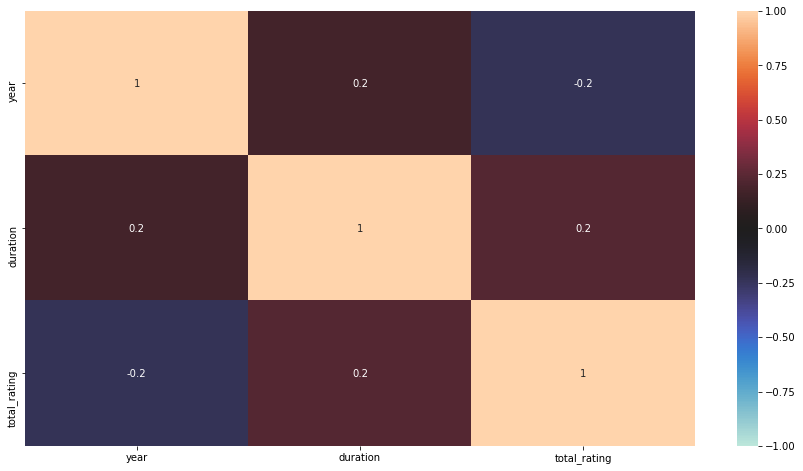

In [30]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(corr_matrix, annot = True, 
            fmt = '.1g', 
            vmin= -1,
            vmax= 1, 
            center= 0, 
            cmap = 'icefire')

# 6. Highest Rated Genres

In [31]:
#Creating a Dataframe that shows the total ratings for each genre
highest_genre = new_df.groupby('genre').total_rating.sum().sort_values(ascending = False).reset_index()
highest_genre[0:10]

,genre,total_rating
0,Drama,78532.20
1,Comedy,42303.05
2,"Comedy, Drama",24892.90
3,"Drama, Romance",21677.65
4,"Comedy, Romance",14601.70
5,"Comedy, Drama, Romance",14062.20
6,Horror,9923.50
7,"Crime, Drama",8318.75
8,"Drama, Thriller",7737.05
9,"Action, Crime, Drama",7586.90


## 6.1 Plotting by Rating

<AxesSubplot:xlabel='total_rating', ylabel='genre'>

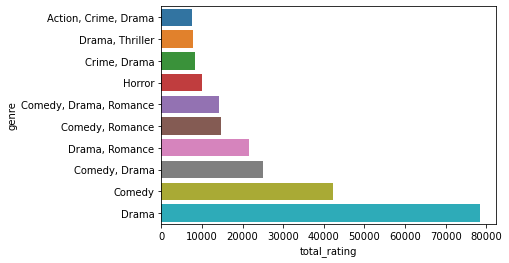

In [32]:
barplot_order = new_df.groupby('genre').total_rating.sum().sort_values(ascending = True).reset_index()
barplot_order[-10:]
sns.barplot(x="total_rating", y="genre", data=barplot_order[-10:])

# 7. Film Genre Production Frequency

In [33]:
#Creating a Dataframe to show how many movies are in each genre
pop_genre = new_df.groupby('genre').title.count().sort_values(ascending = False).reset_index()
pop_genre.rename(columns={'title': 'movies'}, inplace = True)
pop_genre[0:10]

,genre,movies
0,Drama,12543
1,Comedy,7693
2,"Comedy, Drama",4039
3,"Drama, Romance",3455
4,"Comedy, Romance",2508
5,"Comedy, Drama, Romance",2293
6,Horror,2268
7,"Drama, Thriller",1348
8,"Crime, Drama",1343
9,"Action, Crime, Drama",1310


## 7.1 Plotting Film Genre Production Frequency

<AxesSubplot:xlabel='title', ylabel='genre'>

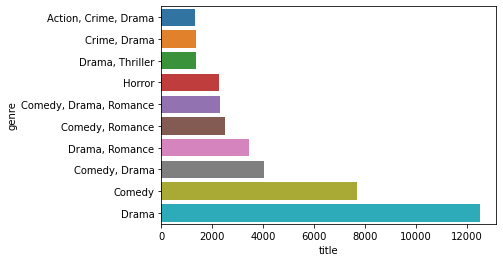

In [34]:
barplot_order = new_df.groupby('genre').title.count().sort_values(ascending = True).reset_index()
barplot_order[-10:]
sns.barplot(x="title", y="genre", data=barplot_order[-10:])

# 8. Genres by Votes

In [35]:
genre_votes = df.groupby('genre').total_votes.sum().sort_values(ascending = False).reset_index()
#pop_genre.rename(columns={'title': 'movies'}, inplace = True)
genre_votes[0:10]

,genre,total_votes
0,"Action, Adventure, Sci-Fi",44475056
1,Drama,34227618
2,"Comedy, Drama, Romance",27881580
3,Comedy,25601112
4,"Animation, Adventure, Comedy",23776443
5,"Action, Adventure, Fantasy",22843735
6,"Drama, Romance",21735881
7,"Comedy, Drama",20241249
8,"Crime, Drama, Thriller",19377967
9,"Action, Crime, Drama",19062718


## 8.1 Plotting Genre by Votes

<AxesSubplot:xlabel='total_votes', ylabel='genre'>

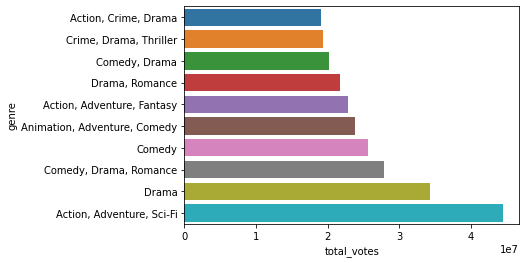

In [36]:
barplot_order = df.groupby('genre').total_votes.sum().sort_values(ascending = True).reset_index()
barplot_order[-10:]
sns.barplot(x="total_votes", y="genre", data=barplot_order[-10:])

## 8.2 Genre by Gender

In [37]:
#Creating a Dataframe with male and female voters
gender_df = df[['title', 'year', 'date_published', 'genre', 'duration', 'country', 'language', 'director', 'writer',
             'production_company', 'males_allages_votes', 'females_allages_votes', 'total_rating']].copy()
gender_df = gender_df.sort_values(by=['total_rating'], ascending = False)
male_votes = gender_df.groupby('genre').males_allages_votes.sum().sort_values(ascending = False).reset_index()
female_votes = gender_df.groupby('genre').females_allages_votes.sum().sort_values(ascending = False).reset_index()
gender_df = pd.merge(male_votes, female_votes, how='outer', on=['genre', 'genre'])
gender_df.head(10)

,genre,males_allages_votes,females_allages_votes
0,"Action, Adventure, Sci-Fi",28784941.0,4968114.0
1,Drama,21385718.0,5338051.0
2,Comedy,16889679.0,3369781.0
3,"Comedy, Drama, Romance",15374217.0,6744340.0
4,"Action, Adventure, Fantasy",14599916.0,2753528.0
5,"Animation, Adventure, Comedy",13676734.0,4346434.0
6,"Action, Crime, Drama",13328314.0,1672658.0
7,"Crime, Drama, Thriller",12986475.0,2099814.0
8,"Comedy, Drama",12410398.0,3470973.0
9,"Drama, Romance",11763784.0,5088627.0


## 8.3 Plotting Genre by Gender

<AxesSubplot:title={'center':'Genre Votes by Gender'}, ylabel='genre'>

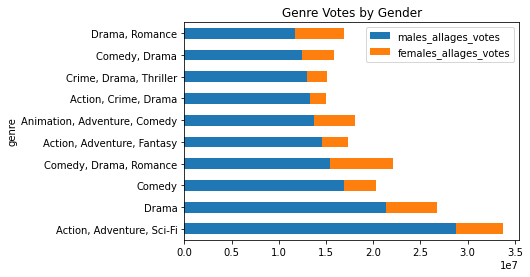

In [38]:
gender_df[0:10].plot(x='genre', kind='barh', stacked=True, title= 'Genre Votes by Gender')

# 9. Directors

In [39]:
# Highest rated Directors with more than 1 title.
directors = df.groupby(['director', 'total_rating']).title.count().sort_values(ascending = False).reset_index()
top10 = directors[0:10]
top10.sort_values(by=['total_rating'], ascending = False)

,director,total_rating,title
8,Anthony Mann,7.25,5
5,Clarence Brown,6.65,5
7,John Ford,6.65,5
1,Woody Allen,6.60,6
0,George Marshall,6.50,7
2,Lesley Selander,6.35,6
3,Alfred E. Green,6.25,5
9,Ray Enright,6.10,5
6,Lesley Selander,6.05,5
4,Peter Hyams,5.75,5
